# Week 5
## *Advanced network measures and communities*

## Notes to video lectures
*Mostly the core concepts to understand*

General tool: randomization

### Communities


#### Cliques (related to communities)
* Subgraph where everyone is connected to one another.
* Formally: **Maximal completed subgraph**

### Centrality
**Fast overview**
![alt text](http://localhost:8888/files/Documents/GitHub/02805%20-%20Social%20Graphs%20and%20Interactions/centrality_overview.PNG "Centrality visualized")
Examples of A) Betweenness centrality, B) Closeness centrality, C) Eigenvector centrality, D) Degree centrality, E) Harmonic Centrality and F) Katz centrality of the same graph.

Hard to talk about in larger graphs, but easy in small ones.

*Degree Centrality*
* The most central node in a network. 
* How central you are is based on how connected you are.

*Closeness Centrality*
* The mean geodesic distance (shortest path) between a vertex *v* and all other vertices reachable from it.
* *Really expensive to calculate*

*Betweenness Centrality*
* A centrality measure of a vertex within a graph. Vertices that occur on many shortest paths between other vertices have higher betweenness than those that do not.
* *Who are the messages going through?*
* *Who will you shoot first during a zombie attack?*
* *How many pairs of individuals would have to go through youin orer to reach one another in the minimum number of hops*

*Eigenvector Centrality*
* The importance of a node in a network.
* How frequently would you find a guy (random walker) sitting on your network.
* i.e.: Google's page rank.

### Clustering
For every node, clustering is in a color-scale. Only two or three friends.
* High degree, high clustering
* Low degree, low clustering

Plot degree against clustering to see the correlation.

### Mixing patterns
In networks, there's a thing we call *homopholy*:

*Assortative* - *"lige børn leger bedst"*
* Guys that are similar, like guys like themselves. 
* The diagonal of the pattern carries the most weight.

*Disassortative*
* Nodes of high degree connected to nodes of low degrees. 
* Like a high capacity router connect low degree nodes.

Can be calculated with the *Pierson formula* - already in networkx

## Exercises - Structure of the philosopher network

[Documentation](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.component.html) for using the weakly connected component in the directed graph

### Converting the directed graph to an undirected one
*Keep a version of the directed graph for some of the exercises!*

In [52]:
# Import relevant libraries and initialize network
import networkx as nx
import cPickle as pickle
%matplotlib inline

In [53]:
# Reading the philosophers into directed graph 
data=nx.read_gpickle('phil_test.pkl')
phil_graph = nx.DiGraph(data) 

In [54]:
# Creating a directed graph from the directed version
phil_graph_undirected = phil_graph.to_undirected()

### 5 most central philosophers, according to *betweenness centrality*
Documentation [here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html)

In [55]:
import operator
# Finding betweenness centrality for all nodes
betweenDict = nx.betweenness_centrality(phil_graph_undirected)

# Picking out the 5 highest values of betweenness centrality from the dictionary
sorted(betweenDict.iteritems(), key=operator.itemgetter(1), reverse=True)[:5]

[('Aristotle', 0.07839437547336882),
 ('Immanuel Kant', 0.07699789600352631),
 ('Bertrand Russell', 0.06605231254959765),
 ('Plato', 0.05063149225770689),
 ('David Hume', 0.043710050204794564)]

####  QUESTION: 
*What role do you imagine philosophers with high wikipedia graph betweenness centrality play in the history of philosophy?*



For the philosophers to be central, I believe that they are all relatively old (historically). This way it is possible for the philosophers to have been cited/seen as an inspiration for many years.

Further more they might be central in their field, which means that the different philosophers are some of the most important in different fields.

Otherwise they might be relevant to the modern world and might therefore have a higher number of links since the wolrd is getting more and more connected.


### 5 most central philosophers according to *eigenvector centrality*
* For both in and out-degree
* Documentation [here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html)

In [56]:
# Finding the eigenvector centrality
eigenDict = nx.eigenvector_centrality(phil_graph_undirected)

# Picking out the 5 highest values of eigenvector centrality for the dict
sorted(eigenDict.iteritems(), key=operator.itemgetter(1), reverse=True)[:5]

[('Immanuel Kant', 0.2635982491051754),
 ('Aristotle', 0.23076966455831144),
 ('Plato', 0.18901183599133944),
 ('Bertrand Russell', 0.1880333733012837),
 ('Georg Wilhelm Friedrich Hegel', 0.18379887327809108)]

#### QUESTION
* How is eigenvector centrality difference from degree centrality?

Degree centrality looks at how connected you are, eigenvector centrality accounts for how important you are to the entire network -- how many nodes are somehow connected by you, not only a quantitative evaluation.


* Compare your results for eigenvector centrality to the results for betweenness centrality - does the difference make sense when you read the philosopher's wikipedia pages?

Yes, Aristotle was mentioned in all the different core areas of the philosophers, Kant and Plato are both huge within their fields. Common for all philosophers are, that they are a huge inspiration to all their fields.   


### Is the undirected version of the graph assortative with respect do degree? 
(e.g. do high-degree philosophers tend to link to other high-degree philosophers, and low-degree philosophers to other low-degree philosophers?). 

Documentaton [here](https://networkx.github.io/documentation/development/_downloads/networkx_reference.pdf)

* Provide an interpretation of your answer

In [57]:
# Find the assortativity coefficient
print "Assortativity coefficient:", nx.degree_assortativity_coefficient(phil_graph_undirected)


Assortativity coefficient: -0.0714504881172


Since the coeffient is negative, the graph is not **unassortative**. This has to do with the fact that the graph is now directed. The centrality of the graph is therefore off. 

## Exercises - Age an structure in the philosopher network

Documentation on [subgraphs](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.subgraph.html)

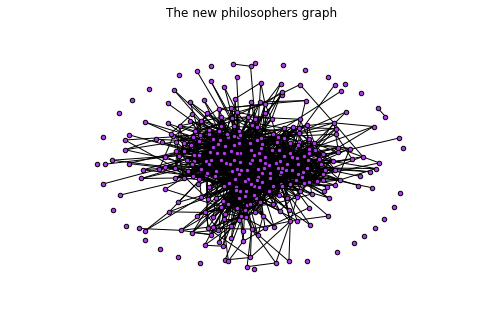

In [70]:
import urllib2
import networkx as nx
import json 


response = urllib2.urlopen('https://dl.dropboxusercontent.com/u/153071/02805/philosopher_birth_year.json')
# Getting the nodes of ages into graph
json_dict = response.read()
in_ages = json.loads(json_dict) # dict type

# Giving the age graph it's own set of edges from the undirected graph
age_graph = nx.Graph(phil_graph_undirected.subgraph(in_ages))

nx.draw_spring(age_graph,node_size=20,node_color='#B23AEE',scale=2)
plt.title("The new philosophers graph")
plt.show()



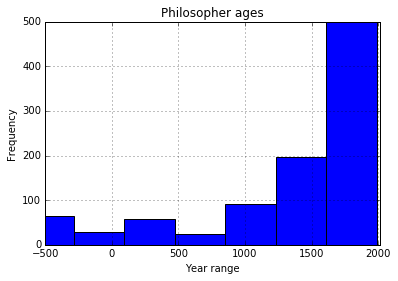

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# THIS WILL BE MADE AT SOME POINT

# The histogram of philosophers born in different centuries (500 year bins)
age_info = list(in_ages.values())

plt.hist(age_info,bins=10)
# For readability
plt.grid(True)
plt.title("Philosopher ages")
plt.xlabel("Year range")
plt.ylabel("Frequency")
plt.axis([-500,2015,0,500])
plt.show()

From the plot it is clear that the number of philosophers has increased significantly within the last century. As can be seen from the histogram, we are getting more and more philosophers. Much of the newer philosophers are all inspired by the great early philosophers. Philosophy is constantly evolving as new theories emerges but most of the philosophers today are greatly insipred by the early philosophers.

In [88]:
# Find the assortativity coefficient
print "Assortativity coefficient:", nx.degree_assortativity_coefficient(age_graph)


 Assortativity coefficient: -0.117444067251


The undirected version of the graph is not asssortative with respect to age.

### Age vs. in-degree
Is there a correlation?

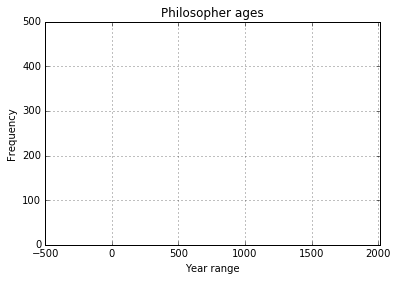

In [105]:
degree_list = list(age_graph.degree().values())


#plt.plot(age_info,degree_list)
# For readability
plt.grid(True)
plt.title("Philosopher ages")
plt.xlabel("Year range")
plt.ylabel("Frequency")
plt.axis([-500,2015,0,500])
plt.show()

## Part B: The branches of philosophy. Are they communities?

#### Modularity
*Random networks lack an inherent community structure*

Removing edges to find communities. 
* How many of all the edges that links to a community $a_i$
* A good division of nodes  does not only have a few edges, it has fewer than expected edges between communities.


> *Betweenness centrality*, calculate all shortest paths (heavy) the number of time a certain node is on a shortest path is the betweenness centrality.

$M$

![alt text](http://localhost:8888/files/Documents/GitHub/02805%20-%20Social%20Graphs%20and%20Interactions/communities.PNG "Partitions and communities\")

Higher modularity implies better partition
* The higher is $M$ for a partition, the better is the corresponding community structure. Indeed, in Image 9.16a the partition with the maximum modularity ($M=0.41$) accurately captures the two obvious communities. A partition with a lower modularity clearly deviates from these communities (Image 9.16b). Note that the modularity of a partition cannot exceed one.

Zero and Negative Modularity
* By taking the whole network as a single community we obtain M=0, as in this case the two terms in the parenthesis of (9.12) are equal (Image 9.16c). If each node belongs to a separate community, we have Lc=0 and the sum (9.12) has nc negative terms, hence M is negative (Image 9.16d).

*Optimal partition*

The partition with maximal modularity $M=0.41$ closely matches two distict communities.

*Suboptimal partition*

A partition with a sub-optimal but positive modularity, $M=0.22$, fails to correctly identify the communities present in the network.

*Single Community*

If we assign all nodes to the same community we obtain $M=0$, independent of the network structure.

*Negative modularity*

If we assign each node to a different community, modularity is negative, obtaining $M=-0.12$.


### Exercises - Modularity of branches


In [ ]:
from sets import Set


aestheticians = Set([])
epistemologists = Set([]) 
ethicists = Set([])
logicians = Set([])
metaphysicians = Set([])
social_and_political_philosophers = Set([])